# Library Tutorial - Running and Plotting

This tutorial shows show to use PyBioNetGen's library to run a simple BNGL model and plot the results, using the simple "SIR.bngl" model.

Before using the library, it must be imported.

In [1]:
import bionetgen

## Running a Model

The `run` method can be used to simply run a BNGL model.

In [2]:
result = bionetgen.run("SIR.bngl")

BioNetGen version 2.6.0
Reading from file c:\Users\cjarm\Documentation\PyBioNetGen\docs\source\tutorials\SIR.bngl (level 0)
Read 5 parameters.
Read 2 species.
Read 3 observable(s).
Read 2 reaction rule(s).
ACTION: generate_network( SIR )
Iteration   0:     2 species      0 rxns  0.00e+00 CPU s
Iteration   1:     3 species      2 rxns  0.00e+00 CPU s
Iteration   2:     3 species      2 rxns  0.00e+00 CPU s
Cumulative CPU time for each rule
Rule   1:     1 reactions 0.00e+00 CPU s 0.00e+00 CPU s/rxn
Rule   2:     1 reactions 0.00e+00 CPU s 0.00e+00 CPU s/rxn
Total   :     2 reactions 0.00e+00 CPU s 0.00e+00 CPU s/rxn
Wrote network in net format to SIR.net.
CPU TIME: generate_network 0.00 s.
ACTION: simulate( method=>"cvode" )
Network simulation using cvode
Wrote network in net format to SIR.net.
Running run_network on DESKTOP-CKHAV0T
full command: C:\Users\cjarm\AppData\Local\Programs\Python\Python39\lib\site-packages\bionetgen\bng-win\bin\run_network.exe -o SIR -p cvode -a 1e-08 -r 1e-0

Optionally, the results can be saved in a new or existing folder.

In [3]:
result = bionetgen.run("SIR.bngl", out = "SIR_folder")

BioNetGen version 2.6.0
Reading from file c:\Users\cjarm\Documentation\PyBioNetGen\docs\source\tutorials\SIR.bngl (level 0)
Read 5 parameters.
Read 2 species.
Read 3 observable(s).
Read 2 reaction rule(s).
ACTION: generate_network( SIR )
Iteration   0:     2 species      0 rxns  0.00e+00 CPU s
Iteration   1:     3 species      2 rxns  0.00e+00 CPU s
Iteration   2:     3 species      2 rxns  0.00e+00 CPU s
Cumulative CPU time for each rule
Rule   1:     1 reactions 0.00e+00 CPU s 0.00e+00 CPU s/rxn
Rule   2:     1 reactions 0.00e+00 CPU s 0.00e+00 CPU s/rxn
Total   :     2 reactions 0.00e+00 CPU s 0.00e+00 CPU s/rxn
Wrote network in net format to SIR.net.
CPU TIME: generate_network 0.00 s.
ACTION: simulate( method=>"cvode" )
Network simulation using cvode
Wrote network in net format to SIR.net.
Running run_network on DESKTOP-CKHAV0T
full command: C:\Users\cjarm\AppData\Local\Programs\Python\Python39\lib\site-packages\bionetgen\bng-win\bin\run_network.exe -o SIR -p cvode -a 1e-08 -r 1e-0

To view the resulting gdat record array of the model, use the `gdat` attribute:

In [4]:
result.gdats["SIR"][:10]

rec.array([(0.  , 99.        , 1.        , 0.        ),
           (0.15, 98.87298897, 1.07566049, 0.05135054),
           (0.3 , 98.7365611 , 1.15685706, 0.10658185),
           (0.45, 98.59005797, 1.24396498, 0.16597704),
           (0.6 , 98.43278098, 1.33738054, 0.22983849),
           (0.75, 98.26399011, 1.4375212 , 0.2984887 ),
           (0.9 , 98.08290282, 1.54482586, 0.37227132),
           (1.05, 97.8886927 , 1.65975502, 0.45155228),
           (1.2 , 97.68048848, 1.78279067, 0.53672085),
           (1.35, 97.45737335, 1.91443598, 0.62819067)],
          dtype=[('time', '<f8'), ('S', '<f8'), ('I', '<f8'), ('R', '<f8')])

Alternatively, you can use the index of the `result` object to get the gdat values:

In [12]:
result[0][:10]

IndexError: list index out of range

Similarly, to view the resulting cdat record array of the model, use the `cdat` attribute:

In [5]:
result.cdats["SIR"][:10]

rec.array([(0.  , 99.        , 1.        , 0.        ),
           (0.15, 98.87298897, 1.07566049, 0.05135054),
           (0.3 , 98.7365611 , 1.15685706, 0.10658185),
           (0.45, 98.59005797, 1.24396498, 0.16597704),
           (0.6 , 98.43278098, 1.33738054, 0.22983849),
           (0.75, 98.26399011, 1.4375212 , 0.2984887 ),
           (0.9 , 98.08290282, 1.54482586, 0.37227132),
           (1.05, 97.8886927 , 1.65975502, 0.45155228),
           (1.2 , 97.68048848, 1.78279067, 0.53672085),
           (1.35, 97.45737335, 1.91443598, 0.62819067)],
          dtype=[('time', '<f8'), ('S1', '<f8'), ('S2', '<f8'), ('S3', '<f8')])

## Plotting Results

To plot the gdat record array, matplotlib will be needed:

In [6]:
import matplotlib.pyplot as plt

For accessibility, save the gdat record array as its own object. Then, the values can be plotted.

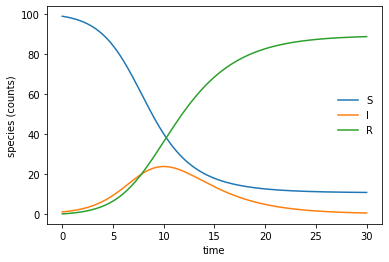

In [10]:
r = result[0]

for name in r.dtype.names:
    if name != "time":
        plt.plot(r['time'], r[name], label = name)
plt.xlabel("time")
plt.ylabel("species (counts)")
_ = plt.legend(frameon = False)